In [1]:
import numpy as np

线性回归模型

In [13]:
class Linear_Regression():
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    def fit(self,X,Y):
        #n是训练的样例，f是训练的特征
        self.n,self.f=X.shape
        #w是权重，b是偏差（截距）
        self.w = np.zeros(self.f)
        self.b = 0
        self.X = X 
        self.Y = Y
        #应用梯度下降算法
        for i in range(self.no_of_iterations):
            self.update_weights()
    def update_weights(self):
        Y_prediction = self.predict(self.X)
        # 计算梯度
        dw = -(2*(self.X.T).dot(self.Y-Y_prediction))/self.n
        db = -2*np.sum(self.Y-Y_prediction)/self.n
        # 更新权重
        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db
    def predict(self,X):
        return X.dot(self.w)+self.b

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
salary_data = pd.read_csv('./ML_dataset/salary_data.csv')

In [5]:
#检查是否有缺失值。
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

训练线性回归模型

In [31]:
model = Linear_Regression(learning_rate=0.02,no_of_iterations=1000)#learning rate 是根据情况而变的。

In [32]:
model.fit(X_train,Y_train)

In [33]:
print('weight= ',model.w[0])
print('bias= ',model.b)

weight=  9514.400999035135
bias=  23697.406507136307


In [34]:
test_data_prediction = model.predict(X_test)

In [35]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


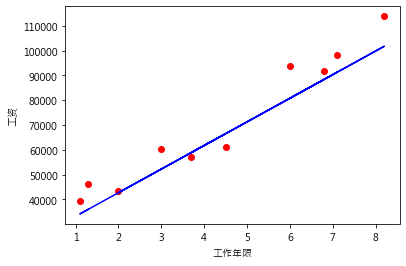

In [36]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('工作年限')
plt.ylabel('工资')
plt.show()